# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Ouput Directory for chart images
output_dir = "../output_data/"

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Creating subset of cities in count of 50
n = 50
def divide_cities(cities, n):
    for i in range(0, len(cities), n):
        yield cities[i:i + n]
cities = list(divide_cities(cities, n))

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# list for response results
citynames = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

print("Begining Data Retrieval")
print("------------------------------")
    
# loop through cities, make API request, and append desired results
for idx1, city_list in enumerate(cities, start = 1):
    for idx2, city in enumerate(city_list):
        try:
            response = requests.get(query_url + city).json()
            print(f"Processing Record {idx2} of set {idx1} | {city}")
            citynames.append(response['name'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
        except KeyError:
            print("City not found. Skipping...")
    
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Begining Data Retrieval
------------------------------
Processing Record 0 of set 1 | richards bay
Processing Record 1 of set 1 | lebu
Processing Record 2 of set 1 | jamestown
Processing Record 3 of set 1 | hobart
Processing Record 4 of set 1 | bluff
Processing Record 5 of set 1 | puerto ayora
Processing Record 6 of set 1 | novikovo
Processing Record 7 of set 1 | codrington
Processing Record 8 of set 1 | tlahualilo
City not found. Skipping...
Processing Record 9 of set 1 | naze
Processing Record 10 of set 1 | la ronge
Processing Record 11 of set 1 | maniitsoq
Processing Record 12 of set 1 | vao
Processing Record 13 of set 1 | fortuna
Processing Record 14 of set 1 | touros
Processing Record 15 of set 1 | punta arenas
Processing Record 16 of set 1 | mbala
Processing Record 17 of set 1 | berlevag
Processing Record 18 of set 1 | dongsheng
Processing Record 19 of set 1 | karwar
Processing Record 20 of set 1 | zhezkazgan
Processing Record 21 of set 1 | sibu
Processing Record 22 of set 1 | ma

Processing Record 41 of set 4 | chokurdakh
Processing Record 42 of set 4 | kalevala
Processing Record 43 of set 4 | port hedland
Processing Record 44 of set 4 | eenhana
Processing Record 45 of set 4 | poum
Processing Record 46 of set 4 | vila velha
Processing Record 47 of set 4 | longlac
City not found. Skipping...
Processing Record 48 of set 4 | ube
Processing Record 49 of set 4 | tuktoyaktuk
Processing Record 0 of set 5 | suntar
Processing Record 1 of set 5 | kemijarvi
Processing Record 2 of set 5 | eskasem
City not found. Skipping...
Processing Record 3 of set 5 | krasnyy chikoy
Processing Record 4 of set 5 | upernavik
Processing Record 5 of set 5 | sisimiut
Processing Record 6 of set 5 | kuala kedah
Processing Record 7 of set 5 | dharchula
Processing Record 8 of set 5 | havoysund
Processing Record 9 of set 5 | lata
Processing Record 10 of set 5 | banjar
Processing Record 11 of set 5 | namatanai
Processing Record 12 of set 5 | thompson
Processing Record 13 of set 5 | juntas
Processi

Processing Record 29 of set 8 | big spring
Processing Record 30 of set 8 | shanghai
Processing Record 31 of set 8 | mindelo
Processing Record 32 of set 8 | sofiysk
City not found. Skipping...
Processing Record 33 of set 8 | progreso
Processing Record 34 of set 8 | klyuchevskiy
Processing Record 35 of set 8 | vuktyl
Processing Record 36 of set 8 | sinnamary
Processing Record 37 of set 8 | huicungo
Processing Record 38 of set 8 | filotion
Processing Record 39 of set 8 | gimli
Processing Record 40 of set 8 | madang
Processing Record 41 of set 8 | pakxe
Processing Record 42 of set 8 | tabiauea
City not found. Skipping...
Processing Record 43 of set 8 | bonthe
Processing Record 44 of set 8 | omboue
Processing Record 45 of set 8 | plouzane
Processing Record 46 of set 8 | lavrentiya
Processing Record 47 of set 8 | olga
Processing Record 48 of set 8 | sao desiderio
Processing Record 49 of set 8 | kabo
Processing Record 0 of set 9 | jieshi
Processing Record 1 of set 9 | zeya
Processing Record 2

Processing Record 18 of set 12 | charleville-mezieres
Processing Record 19 of set 12 | alyangula
Processing Record 20 of set 12 | waipawa
Processing Record 21 of set 12 | saryshagan
City not found. Skipping...
Processing Record 22 of set 12 | port-cartier
Processing Record 23 of set 12 | chimbote
Processing Record 24 of set 12 | shambu
Processing Record 25 of set 12 | loutros
Processing Record 26 of set 12 | aklavik
Processing Record 27 of set 12 | birao
Processing Record 28 of set 12 | arcachon
Processing Record 29 of set 12 | svetlyy
Processing Record 30 of set 12 | tamiahua
Processing Record 31 of set 12 | navahrudak
Processing Record 32 of set 12 | khormuj
City not found. Skipping...
Processing Record 33 of set 12 | sorong
Processing Record 34 of set 12 | mango
Processing Record 35 of set 12 | naspur
Processing Record 36 of set 12 | buala
Processing Record 37 of set 12 | orocue
Processing Record 38 of set 12 | lalmohan
Processing Record 39 of set 12 | show low
Processing Record 40 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# build a dataframe from the cities, lon,and pressure lists

weather_data = {"City": citynames
                ,"Lat": lat
                ,"Lon": lon
                ,"Temperature": temp
                ,"Humidity": humidity
                ,"Cloudiness": cloudiness
                ,"Windspeed": windspeed
                ,"Country": country
                ,"Date": date
               }
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Richards Bay,-28.78,32.04,74.32,83,100,13.33,ZA,1603178801
1,Lebu,-37.62,-73.65,46.31,77,0,14.63,CL,1603178801
2,Jamestown,42.10,-79.24,53.76,93,90,3.36,US,1603178801
3,Hobart,-42.88,147.33,57.99,58,75,14.99,AU,1603178802
4,Bluff,-46.60,168.33,48.99,75,55,5.99,NZ,1603178802


In [5]:
weather_data.describe()

,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.526364,18.179685,61.458864,71.942308,54.361888,8.521503,1.603179e+09
std,32.877993,92.060873,20.520282,22.455369,40.415662,6.365147,6.490472e+01
min,-54.800000,-179.170000,8.600000,9.000000,0.000000,0.600000,1.603179e+09
25%,-5.020000,-63.260000,46.325000,61.000000,6.000000,4.090000,1.603179e+09
50%,22.850000,23.710000,66.200000,77.500000,71.000000,6.765000,1.603179e+09
75%,48.872500,100.310000,78.152500,90.000000,96.000000,11.410000,1.603179e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,41.380000,1.603179e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_weather_data = weather_data[weather_data["Humidity"]<=100.00]
clean_weather_data.describe()

,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.526364,18.179685,61.458864,71.942308,54.361888,8.521503,1.603179e+09
std,32.877993,92.060873,20.520282,22.455369,40.415662,6.365147,6.490472e+01
min,-54.800000,-179.170000,8.600000,9.000000,0.000000,0.600000,1.603179e+09
25%,-5.020000,-63.260000,46.325000,61.000000,6.000000,4.090000,1.603179e+09
50%,22.850000,23.710000,66.200000,77.500000,71.000000,6.765000,1.603179e+09
75%,48.872500,100.310000,78.152500,90.000000,96.000000,11.410000,1.603179e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,41.380000,1.603179e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
clean_weather_data.head()

,City,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Richards Bay,-28.78,32.04,74.32,83,100,13.33,ZA,1603178801
1,Lebu,-37.62,-73.65,46.31,77,0,14.63,CL,1603178801
2,Jamestown,42.10,-79.24,53.76,93,90,3.36,US,1603178801
3,Hobart,-42.88,147.33,57.99,58,75,14.99,AU,1603178802
4,Bluff,-46.60,168.33,48.99,75,55,5.99,NZ,1603178802


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data.index.names = ["City_ID"]
clean_weather_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

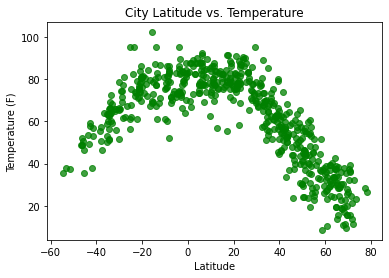

In [9]:

plot_chart = plt.scatter(lat, temp, marker="o", facecolors="green", alpha=0.75)

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name)


## Latitude vs. Humidity Plot

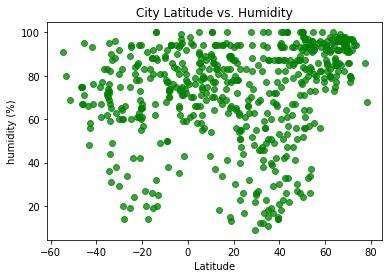

In [10]:
plot_chart = plt.scatter(lat, humidity, marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("humidity (%)")
plt.show()
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Humidity Plot.png"
export_chart.savefig(output_dir + file_name)

## Latitude vs. Cloudiness Plot

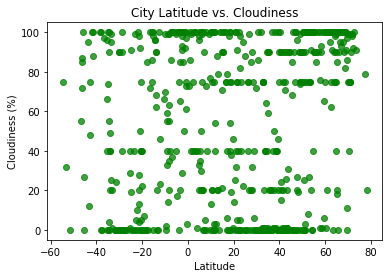

In [11]:
plot_chart = plt.scatter(lat, cloudiness , marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name)


## Latitude vs. Wind Speed Plot

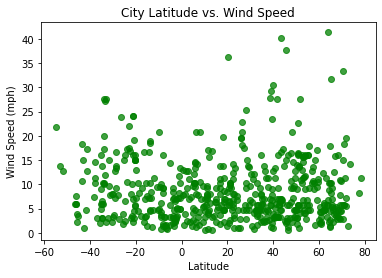

In [12]:
plot_chart = plt.scatter(lat, windspeed, marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Wind Speed Plot.png"
export_chart.savefig(output_dir + file_name)


## Linear Regression

In [13]:
weather_data_n = clean_weather_data[clean_weather_data["Lat"]>=0.00]
weather_data_s = clean_weather_data[clean_weather_data["Lat"]<0.00]
print(weather_data_n.count())
print(weather_data_s.count())

City           401
Lat            401
Lon            401
Temperature    401
Humidity       401
Cloudiness     401
Windspeed      401
Country        401
Date           401
dtype: int64
City           171
Lat            171
Lon            171
Temperature    171
Humidity       171
Cloudiness     171
Windspeed      171
Country        171
Date           171
dtype: int64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

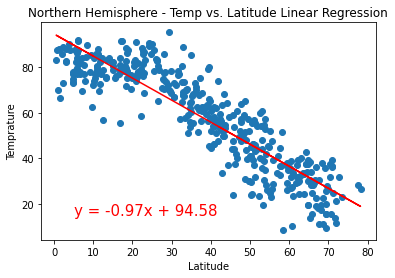

In [14]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.show()

export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

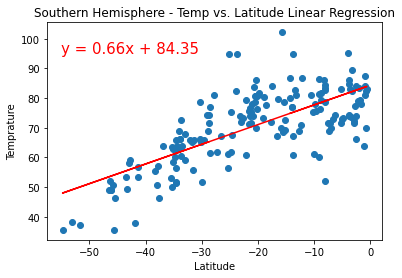

In [15]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title("Southern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.show()

export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

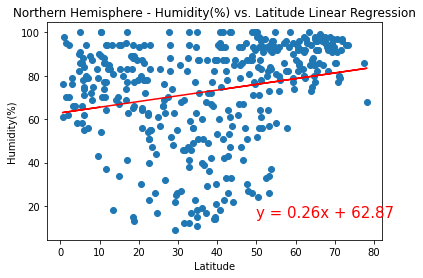

In [16]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Humidity(%) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

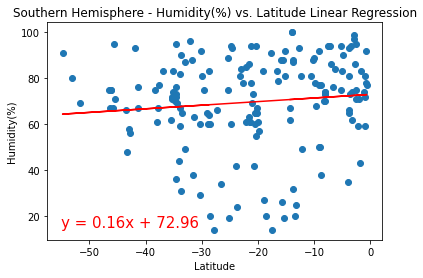

In [17]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Humidity(%) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

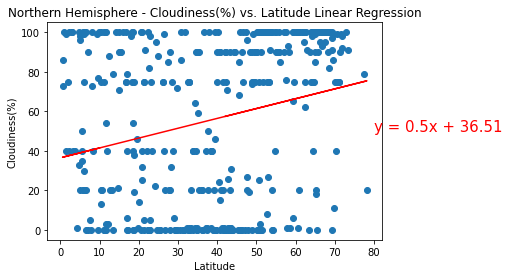

In [18]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(80,50),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

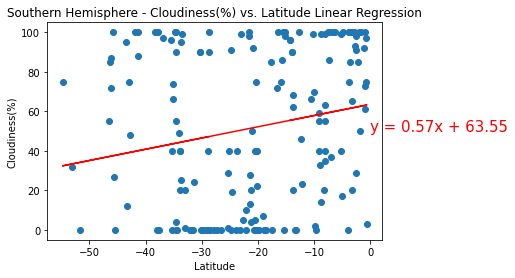

In [19]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

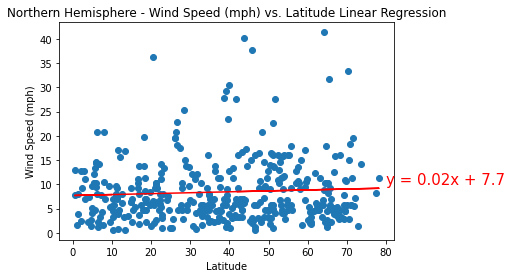

In [20]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(80,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Wind Speed (mph) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

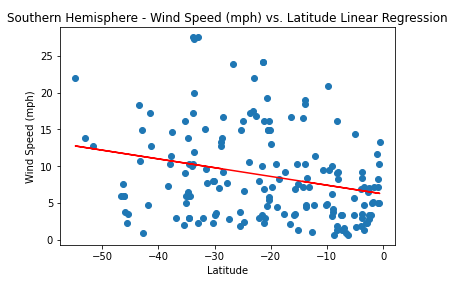

In [21]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Wind Speed (mph) Plot.png"
export_chart.savefig(output_dir + file_name)